In [1]:
import pandas as pd
"""
    1. Remove Irrelevant Rows and columns
        1.a Get rid of main_catergory, pledged, goal, usd pledged and Unnamed: 15
        1.b Get rid of Rows that contain canceled
    2. Get rid of time in "launched"  
        2.a Make sure all data in "launched is of right format"
    3. Check for duplicates, and remove them 
    4. Check for empty (null) values
"""
#reads data
data = pd.read_csv('ks-projects-201801snippet - tline2.csv')

#checks data before 
data.head(30)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.0,2/26/2016 13:38,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,12/21/2014,1000.0,12/1/2014 18:30,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,3/17/2016,25000.0,2/1/2016 20:05,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,5/29/2014,125000.0,4/24/2014 18:14,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,8/10/2014,65000.0,7/11/2014 21:55,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [2]:
#get rid of duplicates, keeps first valid entry
data = data.drop_duplicates(subset = 'ID', keep = 'first')

#getting rid of unwanted / irrelavant columns
data_df = pd.DataFrame(data, columns = ['ID',
                                        'name',
                                        'category',
                                        'main_category',
                                        'deadline',
                                        'launched',
                                        'state',
                                        'backers',
                                        'country',
                                        'usd_pledged_real',
                                        'usd_goal_real' ])

#getting rid of empty data , and empty column 
data_df.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#getting rid of all irrelevant  "canceled state" row entries as well as countries that have "N,0" as a entry
data_df.drop(data.loc[data['state'] == 'canceled'].index, inplace = True)
data_df.drop(data.loc[data['country'] == 'N,0"'].index, inplace = True)


#getting rid of time from launched
data['launched'] = pd.to_datetime(data['launched']).dt.date

#changing data to correct data type
data_df['ID'] = data_df['ID'].astype(int)
data_df['name'] = data['name'].astype(str)
data_df['category'] = data['category'].astype(str)
data_df['state'] = data['state'].astype(str)
data_df['deadline'] = data['deadline'].astype('datetime64[ns]')
data_df['launched'] = data['launched'].astype('datetime64[ns]')
#data_df['usd_pledged_real'] = data_df['usd_pledged_real'].astype(float)
#data_df['backers'] = data_df['backers'].astype(int)

#shows the cleaned data
data_df.head(-100)


,ID,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17,failed,1,US,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26,successful,224,US,52375.00,50000.00
...,...,...,...,...,...,...,...,...,...,...,...
887,100438743,Love. Guts. High School.,Theater,Theater,2012-04-16,2012-03-13,successful,71,US,2667.00,2500.00
888,1004394288,CAFE GANGSTER,Webseries,Film & Video,2014-09-24,2014-08-25,failed,17,US,1220.00,15000.00
889,1004399460,Rivers Monroe Fall Tour 2016,Pop,Music,2016-10-24,2016-10-10,successful,20,US,1310.00,25.00
891,1004405723,Golf Alpha Yankee: An LGBT Human Rights Docume...,Documentary,Film & Video,2014-08-18,2014-06-29,successful,439,US,42060.63,30000.00


In [3]:
#checking data types
data_df.dtypes

ID                           int32
name                        object
category                    object
main_category               object
deadline            datetime64[ns]
launched            datetime64[ns]
state                       object
backers                      int64
country                     object
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [106]:
#connecting to mysql
import mysql.connector
from mysql.connector import Error
try:
    #Attempt to connect
    connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
    
    #get some information regarding our connections
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version: ", db_Info)
        cursor = connection.cursor()
        cursor.execute("SELECT database();")
        record = cursor.fetchone()
        print("You are connected to the database ", record)
        
        #creating database and tables
        cursor.execute("CREATE DATABASE projectDB")
        
        #creating tables
        #project table
        cursor.execute('''CREATE TABLE projects(
                        ID INT,
                        Name VARCHAR(255),
                        Category VARCHAR(255),
                        Main_Category VARCHAR(225),
                        Country VARCHAR(225)
                        State VARCHAR(225))''')
        
        #funding_goal table
        cursor.executes('''CREATE TABLE funding_goal(
                        ID INT,
                        launghed DATE
                        deadline DATE
                        usd_goal FLOAT
                        state VARCHAR(255))''')
        
        #backer table
        cursor.executes('''CREATE TABLE backer(
                        ID INT,
                        backers INT,
                        usd_pledged FLOAT,
                        usd_goal FLOAT)''')
        
        #foreign keys
        cursor.executes('''ALTER TABLE `project`.`backer` 
                            ADD CONSTRAINT `ID`
                              FOREIGN KEY (`ID`)
                              REFERENCES `project`.`projects` (`ID`)
                              ON DELETE NO ACTION
                              ON UPDATE NO ACTION;''')
        
        cursor.executes('''ALTER TABLE `project`.`funding_goal` 
                            ALTER TABLE `project`.`funding_goal` 
                            ADD CONSTRAINT `ID`
                              FOREIGN KEY (`ID`)
                              REFERENCES `project`.`projects` (`ID`)
                              ON DELETE NO ACTION
                              ON UPDATE NO ACTION;
                            ''')
        
        #uploading data to project table
        for row in data_df.itertuples():
            cursor.execute('''INSERT INTO project.projects (ID, name, category, main_category, country, state)
                            VALUES (%s, %s, %s, %s, %s, %s)''',
                           (row.ID,
                            row.name,
                            row.category,
                            row.main_category,
                            row.country,
                            row.state))
            connection.commit()
            
        #uploading data to backer table
        for row in data_df.itertuples():
            cursor.execute('''INSERT INTO project.backer (ID, backers, usd_pledged, usd_goal)
                            VALUES (%s, %s, %s, %s)''',
                          (row.ID,
                          row.backers,
                          row.usd_pledged_real,
                          row.usd_goal_real))
            connection.commit()
            
        #uploading data to funding_goal table
        for row in data_df.itertuples():
            cursor.execute('''INSERT INTO project.funding_goal (ID, launched, deadline, usd_goal, state)
                            VALUES (%s, %s, %s, %s, %s)''',
                          (row.ID,
                          row.launched,
                          row.deadline,
                          row.usd_goal_real,
                          row.state,))
            connection.commit()
    
except Error as e:
    print("Error while connecting to MySQL", e)
    
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")


Connected to MySQL Server version:  8.0.22
You are connected to the database  ('project',)
Error while connecting to MySQL 1007 (HY000): Can't create database 'projectdb'; database exists
MySQL connection is closed.


,Main Category,Failed,# Failed Projects
1,Film & Video,failed,98
0,Music,failed,63
3,Publishing,failed,54
9,Games,failed,45
8,Art,failed,44
5,Technology,failed,37
7,Design,failed,36
12,Food,failed,36
10,Fashion,failed,34
4,Photography,failed,17


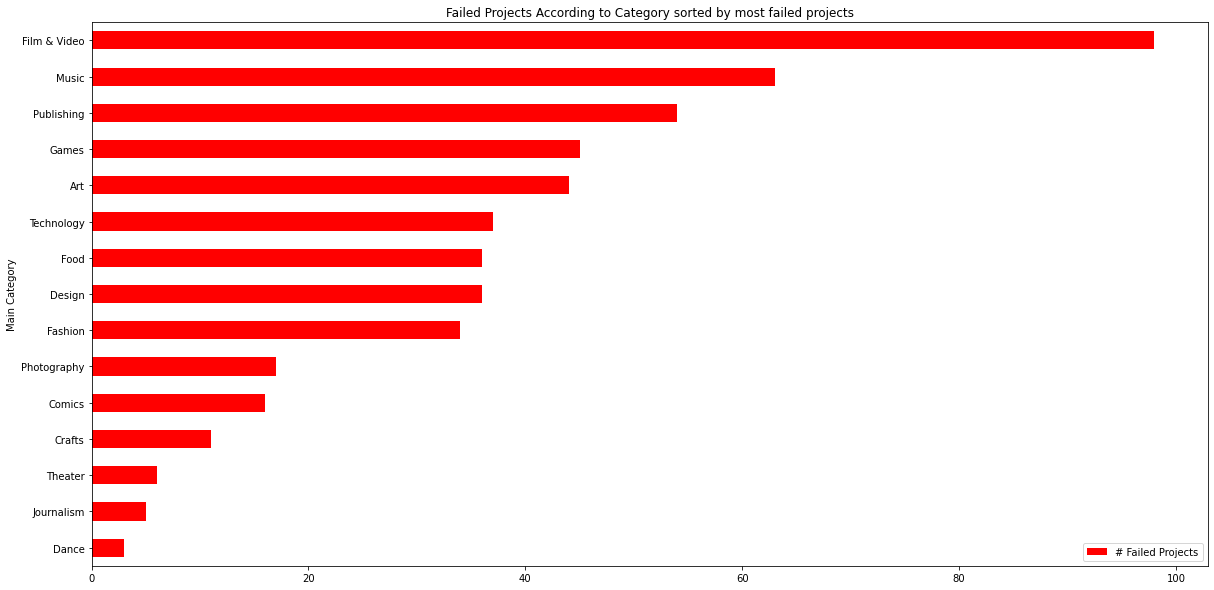

In [119]:
#Question 1 Which of the main categories has the most failed projects? 
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute('''SELECT p.main_category, p.state, count(p.id)
FROM project.projects as p 
WHERE p.state = 'failed'
GROUP BY p.main_category;''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Main Category','Failed','# Failed Projects'])
df.sort_values(by='# Failed Projects',ascending=True, inplace=True)

connection.close()

#creating bar graph
df.plot.barh(x='Main Category',
                            y='# Failed Projects',
                            title="Failed Projects According to Category sorted by most failed projects",
                            color='red',
                            figsize=(20,10))

df.sort_values(by='# Failed Projects',ascending=False, inplace=True)
df


   Main Category  Failed  # Failed Projects
6          Dance  failed                  3
14    Journalism  failed                  5
2        Theater  failed                  6
11        Crafts  failed                 11
13        Comics  failed                 16
4    Photography  failed                 17
10       Fashion  failed                 34
7         Design  failed                 36
12          Food  failed                 36
5     Technology  failed                 37
8            Art  failed                 44
9          Games  failed                 45
3     Publishing  failed                 54
0          Music  failed                 63
1   Film & Video  failed                 98


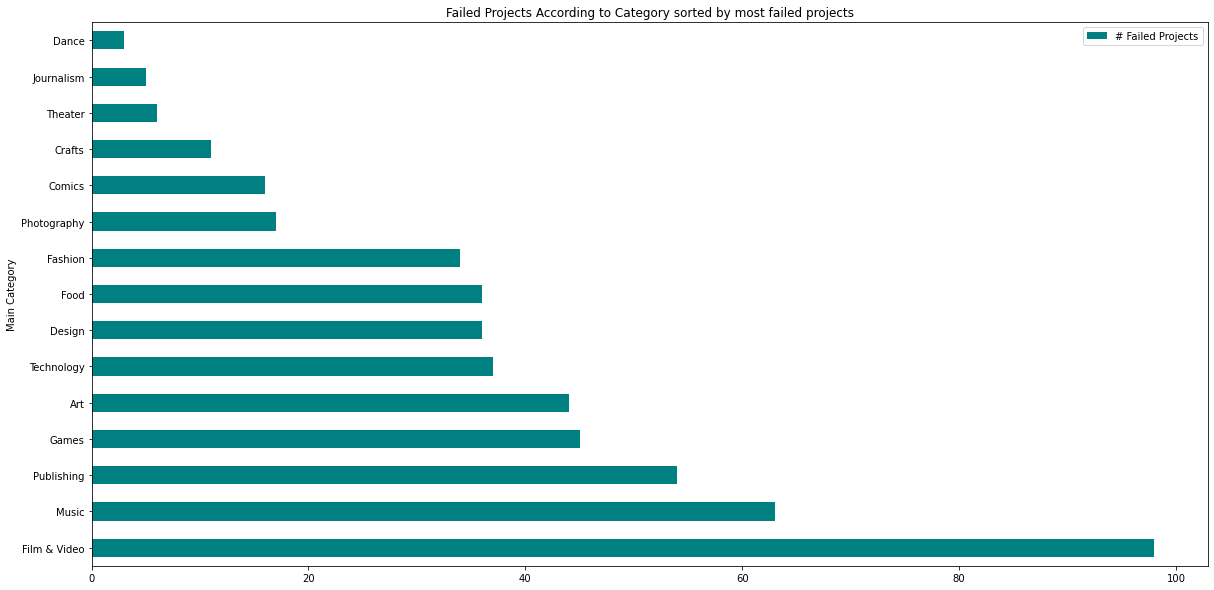

In [120]:
#Question 2 Which of the main categories has the least failed projects?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute('''SELECT p.main_category, p.state, count(p.id)
FROM project.projects as p 
WHERE p.state = 'failed'
GROUP BY p.main_category;''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Main Category','Failed','# Failed Projects'])
df.sort_values(by='# Failed Projects',ascending=False, inplace=True)

connection.close()

#creating bar graph
df.plot.barh(x='Main Category',
                            y='# Failed Projects',
                            title="Failed Projects According to Category sorted by most failed projects",
                            color='teal',
                            figsize=(20,10))

df.sort_values(by='# Failed Projects',ascending=True, inplace=True)
print (df)

In [122]:
#Question 3 - How many projects succeeded with amount of backers between 20 and 40?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')

cursor = connection.cursor()

cursor.execute('''SELECT DISTINCT(p.name), b.backers
FROM project.projects as p, project.backer as b
WHERE p.state = 'successful' AND b.backers <= 40 AND b.backers >= 20
ORDER BY b.backers;''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Project Name', 'No. of Backers'])
df = df. sort_values(by = ['No. of Backers'])
print (df)

connection.close()

                                           Project Name  No. of Backers
0                                            Money Shot              20
262              Wordwright: reÂ·deÂ·finÂ·ing word play              20
261                                            Carriage              20
260                  DAYTRADER - A Financial Board Game              20
259               Be part of the next SMB Project album              20
...                                                 ...             ...
7823                           The Amphibious Red Couch              40
7822  The Holiday Experience 2014 - A Jazzy Christma...              40
7821                           Black Mint Playing Cards              40
7794                 Kingdom: The Angelic War Card Game              40
8084                                      A Dark Forest              40

[8085 rows x 2 columns]


In [124]:
#Question 4 What are the project names and country that met their goal and still failed?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute ('''Select DISTINCT(p.name), p.country, p.state
from project.projects as p,project.backer as b
where usd_goal < usd_pledged and p.state = 'failed';''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Name', 'Country','state'])
df.drop_duplicates(subset=['Name'])
print (df)

                                                  Name Country   state
0                                    SoMo: The Mixtape      US  failed
1    Bad Example (A Southern Trailer Park Fairy Tal...      US  failed
2                                        Piero Marsili      GB  failed
3                                              Borders      GB  failed
4           Rock The Audition-In Concert/Sheri Sanders      US  failed
..                                                 ...     ...     ...
500                 The Dihydrogen Monoxide Conspiracy      US  failed
501         Adoree - European Promo Tour (Summer 2011)      US  failed
502               Read The Bible in 1 Year Card System      US  failed
503                       Rob Wiley Custom Leatherwork      US  failed
504                          N3ON LOVE official launch      US  failed

[505 rows x 3 columns]


   Country  % of Success
15      DK             0
14      AT             0
10      ES             0
4       FR            25
5       AU            25
6       DE            25
8       IT            25
3       MX            29
2       CA            30
9       IE            33
11      SE            33
0       US            44
1       GB            44
7       NO            50
16      BE            50
12      NZ           100
13      CH           100
17      HK           100
18      NL           100


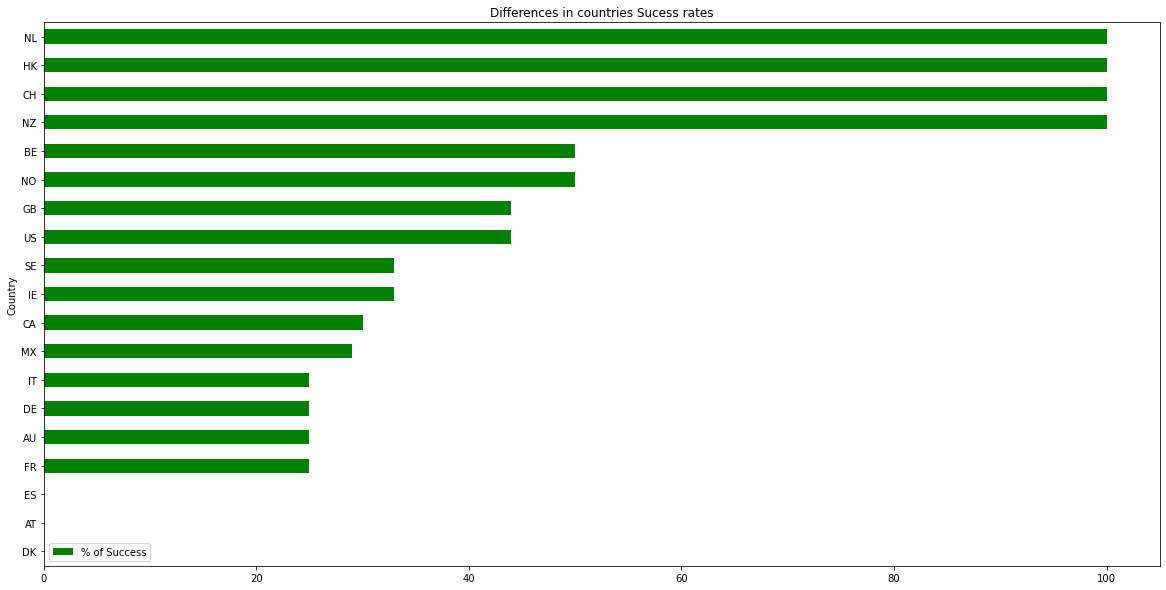

In [125]:
#Question 5 What are the different success rates of each country ?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute('''SELECT country,ROUND((Sucessful_Kickstarters/Kickstarters)*100,0) AS "%_of_Success" FROM 
                        (SELECT country,COUNT(country) AS 'Kickstarters',CAST(SUM(if(state = 'successful', 1, 0 ) )AS SIGNED) AS 'Sucessful_Kickstarters'
                            FROM projects
                            GROUP BY country)sub
                        GROUP BY country''')
result_percent_success_country = cursor.fetchall()
    
#creating a dataframe based off what we got from SQL
df_percentage = pd.DataFrame(result_percent_success_country, columns=['Country', '% of Success'])
df_percentage['% of Success'] = df_percentage['% of Success'].astype(int)

#sorted by %of success
df_percentage.sort_values(by='% of Success', inplace=True)

#printing table query
print(df_percentage)
    
df_percentage.plot.barh(x='Country',
                            y='% of Success',
                            title="Differences in countries Sucess rates",
                            color='green',
                            figsize=(20,10))
connection.close()

   Main Category Country  No. of Projects
0          Music      US              111
1   Film & Video      US              144
2        Theater      US               18
3            Art      US               75
4         Design      US               50
5    Photography      US               23
6          Dance      US                9
7     Publishing      US               58
8           Food      US               46
9        Fashion      US               39
10         Games      US               62
11    Journalism      US                5
12        Crafts      US               12
13        Comics      US               26
14    Technology      US               47


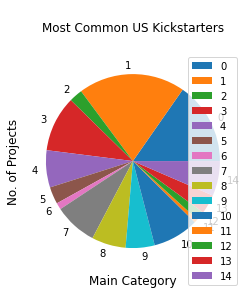

In [126]:
#Question 6 - What’s the most common project type in the US?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute('''SELECT p.main_category, p.country, count(p.id)
FROM project.projects as p 
WHERE p.country = 'US'
GROUP BY p.main_category; ''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Main Category','Country','No. of Projects'])
print (df)

ax = df.plot.pie(x = 'Main Category', y = 'No. of Projects')
ax.set_title('\nMost Common US Kickstarters\n', fontsize = 12, color = 'black')
ax.set_xlabel('Main Category', fontsize = 12, color = 'black')
ax.set_ylabel('No. of Projects', fontsize = 12, color = 'black')
connection.close()

   Main Category  Successful Startups
0   Film & Video                   68
1          Music                   63
2            Art                   41
3         Design                   29
4     Publishing                   24
5     Technology                   24
6        Fashion                   18
7           Food                   22
8    Photography                   12
9          Games                   40
10    Journalism                    4
11        Crafts                    4
12        Comics                   17
13       Theater                   13
14         Dance                    6


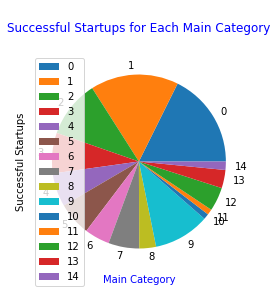

In [127]:
#Question 7 How many successful projects are in each main category?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute('''SELECT p.main_category, count(p.id)
FROM project.projects as p 
WHERE p.STATE = 'successful'
GROUP BY p.main_category; ''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Main Category', 'Successful Startups'])
print (df)

ax = df.plot.pie(x = 'Main Category', y = 'Successful Startups')
ax.set_title('\nSuccessful Startups for Each Main Category\n', fontsize = 12, color = 'blue')
ax.set_xlabel('Main Category', fontsize = 10, color = 'blue')
connection.close()

   Country  Amount of Kickstarters  Successful Kickstarters
2       CA                      30                        9
5       AU                      12                        3
6       DE                       8                        2
8       IT                       8                        2
3       MX                       7                        2
4       FR                       4                        1
17      HK                       3                        3
11      SE                       3                        1
10      ES                       3                        0
9       IE                       3                        1
14      AT                       2                        0
15      DK                       2                        0
16      BE                       2                        1
7       NO                       2                        1
12      NZ                       1                        1
13      CH                       1      

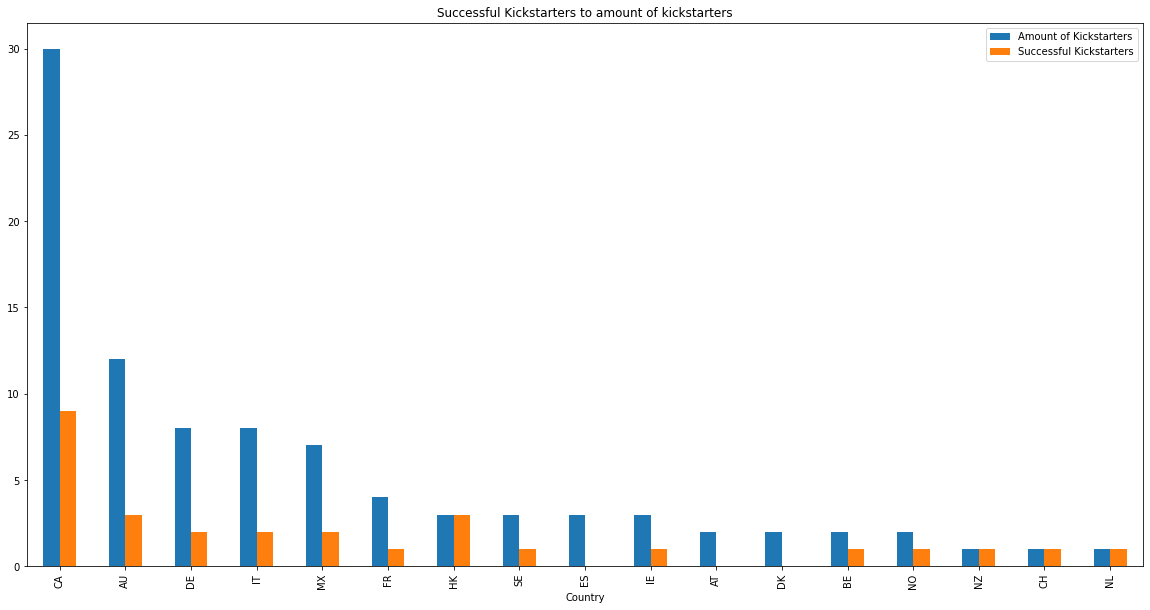

In [128]:
#Question 8 How many successful kickstarters where there outside of US and Great Britain
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute("SELECT country,COUNT(country) AS 'Kickstarters',CAST(SUM(if(state = 'successful', 1, 0 ) )AS SIGNED) AS 'Sucessful_Kickstarters'FROM projects GROUP BY country; ")
result_country = cursor.fetchall()
df_country = pd.DataFrame(result_country, columns= ['Country', 'Amount of Kickstarters', 'Successful Kickstarters'])
    
#getting rid of us and gb data entry
df_country = df_country.drop([0])
df_country = df_country.drop([1])
    
#sorting by amount of kickstarters
df_country.sort_values(by='Amount of Kickstarters',ascending=False, inplace=True)
    
#printing the table that we got from Query
print(df_country)
    
#question 1 "How many sucessful kickstarters where there outside of US and Great Britian"
df_country.plot.bar(x='Country',
            title="Successful Kickstarters to amount of kickstarters",
            figsize=(20,10))

connection.close()

In [129]:
#Question 9 - What projects with the highest USD goals were active the longest?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()
cursor.execute('''SELECT f.id, f.launched, f.deadline, DATEDIFF(deadline,launched), f.usd_goal, f.state
FROM project.funding_goal as f 
ORDER BY f.usd_goal DESC; ''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Project ID', 'Launched','Deadline','Timeframe','USD Goal','State'])

print(df.head(30))
connection.close()

    Project ID    Launched    Deadline  Timeframe   USD Goal       State
0   1004941506  2017-08-19  2017-10-18         60  1600770.0      failed
1   1001542282  2015-09-10  2015-11-09         60  1076400.0      failed
2   1003793542  2014-10-11  2014-12-10         60  1000000.0      failed
3   1001708060  2016-01-08  2016-03-08         60   500000.0      failed
4   1002745522  2014-08-12  2014-09-21         40   500000.0      failed
5   1004668657  2017-02-07  2017-04-08         60   500000.0  successful
6   1003928906  2015-10-10  2015-11-10         31   400000.0      failed
7   1003308182  2016-02-17  2016-03-18         30   398395.0      failed
8   1003240719  2015-04-29  2015-06-24         56   343712.0      failed
9   1000953875  2015-01-22  2015-03-23         60   300000.0      failed
10  1002720451  2014-07-14  2014-08-13         30   300000.0      failed
11  1002856989  2015-07-11  2015-08-10         30   300000.0      failed
12  1003666645  2012-04-06  2012-05-06         30  

   Country  Average Pledge
14      AT       19.065001
3       MX      436.475712
10      ES     1005.269984
7       NO     1204.619976
15      DK     1586.910049
5       AU     1985.151639
4       FR     2080.797526
11      SE     2254.496663
2       CA     2739.002051
16      BE     2846.250114
8       IT     3358.454995
13      CH     4009.530029
6       DE     5625.274861
1       GB     7241.469456
12      NZ     8226.900391
18      NL    11444.639648
9       IE    13777.623606
0       US    18559.178610
17      HK    89469.257161


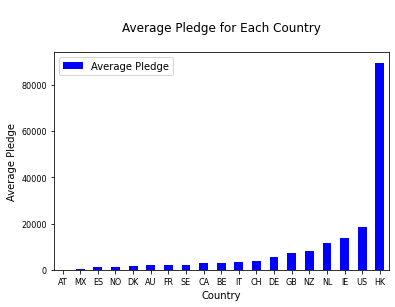

In [130]:
#Question 10 What is the average amount pledged for each country?
connection = mysql.connector.connect(user = 'root',
                                         password = 'Combat69',
                                         host = '127.0.0.1',
                                         database = 'project')
cursor = connection.cursor()

cursor.execute('''SELECT P.COUNTRY, AVG(B.USD_pledged)
FROM project.projects as P, PROJECT.BACKER AS B
WHERE P.ID = B.ID
GROUP BY P.COUNTRY;''')

result = cursor.fetchall()
df = pd.DataFrame(data = result, columns = ['Country', 'Average Pledge'])
df = df. sort_values(by = ['Average Pledge'])
print (df)

ax = df.plot.bar(x = 'Country', y = 'Average Pledge', color = 'blue', rot = 0)
ax.set_title('\nAverage Pledge for Each Country\n', fontsize = 12, color = 'black')
ax.set_xlabel('Country', fontsize = 10, color = 'black')
ax.set_ylabel('Average Pledge', fontsize = 10, color = 'black')
ax.tick_params(axis = 'both', color = 'black', labelsize = 8)

connection.close()